# KMeans Clustering Iris Data

By Leo Spratt, 2022

# Introduction
I have chosen to use the Iris flower dataset to illustrate K-Means clustering as it contains several attributes that are given directly as numbers in centimetres, which was created by RA Fisher and Dr E. Anderson 1936.

From my own observations in my garden I have seen that Irises have a very distinct petal and sepal arrangement which would surely make them easy to measure accurately. When fully open the irises petal and sepal are the same color.

There are approximately "300 species" of irises (Britannica, 2021), most of which are visually similar and hard to distinguish apart.

Fisher's dataset took only three different Iris species (Setosa, Virginica and Versicolor). He used measurements of the petals and sepals of these three species to make a multivariate dataset. These figures are often used for machine learning demos and experiments as the data is linearly separable and has no empty columns/rows.

For example the iris dataset has been used in combination with a wine dataset for a study on the performance of K-Means with a different number of attributes (Bora et al, 2014). Another example is comparing different distance metrics to estimate cluster values (Chakraborty et al, 2020).

There are several methods of clustering data together, which is an "unsupervised learning task" that groups data into "subgroups or clusters based on similarity/dissimilarity" (Kolhe SR. et al, 2010). Some of the methods we could use are: K-Means, K-Medoids, PAM and CLARA. These are all partition based algorithms (Gupta T. et al, 2018). Clustering allows for large amounts of data to be processed into a simpler result that can be later processed by machine learning or seen visually by the user.

I will be using the K-Means clustering method which uses centroids as the mean point of a cluster, the data surrounding the centroids are grouped to the closest centroid by calculating the Euclidean distance between the two shortest points, the formula for this is:

d = (($p_{1}$ - $q_{1}$)$^{2}$ + ($p_{2}$ - $q_{2}$)$^{2}$)$^{1/2}$

The K-Means clustering algorithm works by first defining the number of centroids to use (the K value), this will also control how many clusters will be created. After K has been defined; randomly picked points matching the K value will be selected out of the dataset, these will be the centroids. Once they have been defined the Euclidean distance is used on all possible paths finding the shortest path for each piece of data. This will group the data related to the closest centroid forming clusters, however the centroids are not yet positioned as the average of the data. Therefore this method will then be repeated for all centroids until either two conditions are met:

1. The centroids no longer move, indicating the data has been clustered correctly
2. The max number of iterations allowed has been reached

(Soni K.G and Patel A, 2017)

To select the K value for the K-Means algorithm I will be using the Elbow Method, there are others that can be used such as "Gap Statistic, Silhouette Coefficient, and Canopy" (Yuan C and Yang H, 2019). The Elbow Method works by calculating the squared distances from each point to the centroid, giving us an inertia/distortion value. The optimum K value is found by looking at the point of inflection.

# Method
This section will show how I processed the data, used the elbow method and clustered it using KMeans in Python.

## Import Libraries
Before running any code some libary imports are required.

- urlib.request is being used to download the data set
- matplotlib is imported to allow for plotting the data onto a graph
- pandas is being imported to allow for datasets to be imported and manipulated in-memory
- sklearn is used to perform kmeans clustering

In [1]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

## Get Data
Before doing any calculations we will need to download and prepare the data.

### Download Data
This section of code allows for the dataset to be downloaded from source into the current working directory. The dataset will be downloaded from the 

When downloading the dataset a few extra white space characters are added so this code removes any by using the `strip()` function.

In [2]:
source_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
download_filename = "iris.data"

with urlopen(source_url) as response:
    content = response.read()
    with open(download_filename, "wb") as fo:
        fo.write(content.strip())

### Process Data
To use the downloaded dataset, it needs to be processed to be ready. It is missing the attribute headers so this code will add a header and write to the processed file path, so that it can be later loaded in as a csv file.

In [3]:
processed_filename = "iris.csv"
csv_header = b"sepal-length,sepal-width,petal-length,petal-width,class"

with open(download_filename, "rb") as src_fo:
    with open(processed_filename, "wb") as fo:
        fo.write(csv_header)
        fo.write(b"\n")
        fo.write(src_fo.read())

### Load Data From CSV Into DataFrame
Once the dataset has been processed into a valid csv file, it can be loaded into a pandas DataFrame. This will allow for easier manipulation later.

In [4]:
df = pd.read_csv(processed_filename)

## Show Loaded Data
Once the data is loaded we can preview the dataset which currently shows all the columns from the csv file.

In [5]:
df

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Select Columns To Use
For clustering only two columns are needed, in this code sample they are selected and referenced in the variable `selected_data`.

In [6]:
column_names = ["sepal-length", "petal-length"]

In [7]:
selected_data = df[column_names]

The `selected_data` can now be previewed, which shows the two selected columns.

In [8]:
selected_data

,sepal-length,petal-length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


## Preview Data
Now the data is loaded it can be previewed without any clusters. This code will plot the selected columns onto a matplotlib scatter chart.

In [9]:
def plot_data(data, x, y, xl, yl, title):
    plt.scatter(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.show()

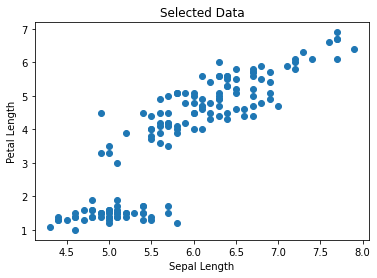

In [10]:
x, y = column_names
plot_data(df, x, y, "Sepal Length", "Petal Length", "Selected Data")

## Find Optimum K Value


To find the optimum number for k we use an elbow plot. The "elbow" of the graph will indicate the k value, we can also go further along increasing the number of clusters as long as the inertia value is high enough, this however is highly dependant on the dataset that is being used.

This code block will calculate KMeans until the `max_k` value is reached, then they will displayed on another matplotlib plot.

In [11]:
def show_elbow_plot(data, max_k):
    means = []
    inertias = []
    
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
    
    plt.figure(figsize=(12,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.title("Elbow Plot Of Possible K Values")
    plt.grid(True)
    plt.show()

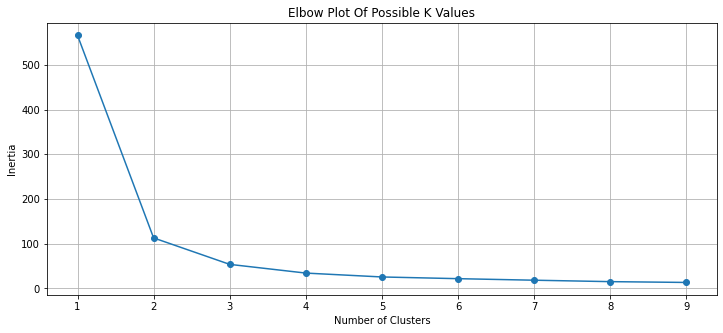

In [12]:
show_elbow_plot(selected_data, 10)

The elbow plot shows that the optimum number to use for k is two, which will mean there will be two clusters. We could also use three, any numbers after that will produce undesired results due to the inertia value being low.

## Calculate KMeans

Once the optimum k value has been found, the selected data can be clustered using kmeans.

In this section of code I have selected the min k value to be one and the max k value to be four, this is so that I can illustrate optimal and non-optimal clusters with different inertia values.

In [13]:
k_min = 1
k_max = 4
cluster_columns = []

for k in range(k_min, k_max + 1):
    kmeans = KMeans(k).fit(selected_data)
    df[f"cluster_{k}"] = kmeans.labels_
    cluster_columns.append(f"cluster_{k}")

## Get Cluster Data

The dataset with the selected columns and clusters can now be previewed.

In [14]:
df[column_names + cluster_columns]

,sepal-length,petal-length,cluster_1,cluster_2,cluster_3,cluster_4
0,5.1,1.4,0,1,1,2
1,4.9,1.4,0,1,1,2
2,4.7,1.3,0,1,1,2
3,4.6,1.5,0,1,1,2
4,5.0,1.4,0,1,1,2
...,...,...,...,...,...,...
145,6.7,5.2,0,0,2,3
146,6.3,5.0,0,0,0,3
147,6.5,5.2,0,0,2,3
148,6.2,5.4,0,0,2,3


## Plot Clusters
To plot the clusters using matplotlib, I have created a function that will draw one cluster with given data, then through the use of a for loop multiple clusters can be created and grouped using subplots.

The `enumerate()` function will allow for us to iterate through the cluster columns and get back a step number, which is used to place the plot in it's correct place on screen.

In [15]:
def plot_cluster(data, kmeans, x, y, c, xl, yl, title):
    plt.scatter(x=x, y=y, c=c, data=data)
    plt.scatter(
        kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
        s=250, marker="x", c="black", label="centers"
    )
    plt.title(title)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.legend(scatterpoints=1)

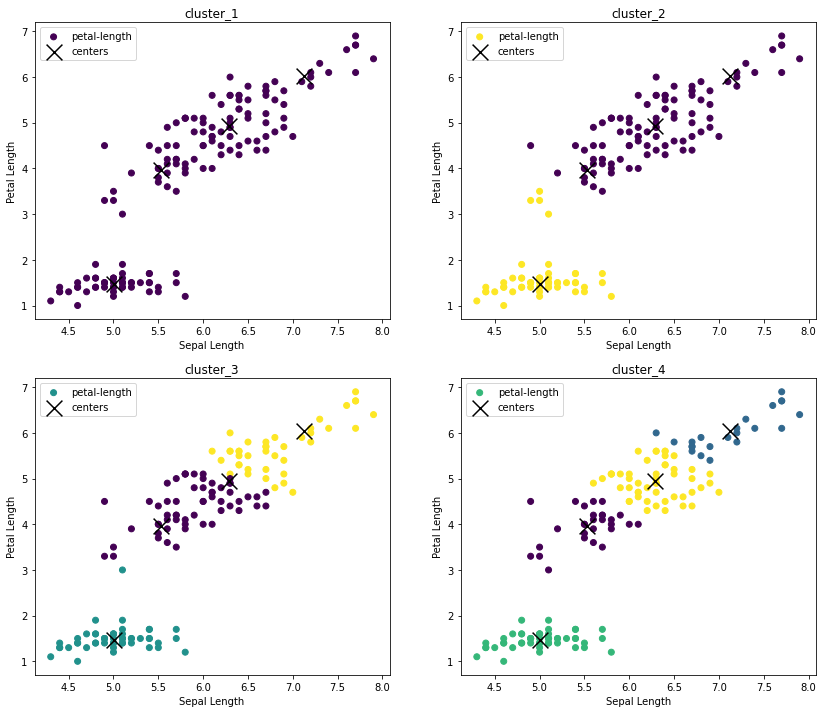

In [16]:
plt.figure(figsize=(14,12))
rows = len(cluster_columns) // 2
for i, k_col in enumerate(cluster_columns, 1):
    plt.subplot(rows, 2, i)
    x, y = column_names
    plot_cluster(df, kmeans, x, y, k_col, "Sepal Length", "Petal Length", k_col)
plt.show()

# Results
After generating the four clusters with K values of one, two, three and four we can see depending on the K value we get varying results.

We can see that having only one cluster does not produce the desired results due to no clustering happening.

Looking at the K value of two we can see that the elbow method has produced the correct outcome to find the optimum value for K, as the two clusters are clearly linearly separated as the two clusters are quite far apart.

The plot with the K value of three, shows that the three species of iris's have been shown which is why this can also be a optimum K value.

The last plot shows what a undesired K value (that being four) would look like when clustered, this produces too many clusters for data that are not distinct enough. If the K value was increased any higher it would just produce more clusters that were smaller but not actually different data, which is why the elbow method finds these to be undesired.

# Conclusion
In conclusion we can see that the iris dataset was clustered so we could see the three species of plants.

There are some issues with using KMeans that may happen when clustering other datasets that are not so distinct and well separated. The first issue is that the value K must be known before any clustering can be done. The second issue is overlapping data cannot be solved accurately. The third issue is due to Euclidean distance being used and that it can give uneven weights, it has been suggested that using city block distance or correlation distance may be more accurate (Chakraborty et al, 2020). The fourth issue is KMeans will only work for non-linear data The fifth issue is that the cluster centers are chosen randomly which can lead to the result being invalid (Gupta T. et al, 2018).

We can see from our results some of these issues. We can see that even when using the optimum value for K found by the Elbow Method (that being two), we will get some data that is associated with the wrong cluster. We can also see the problem with not knowing the K value as the four plots generated with different K values show that the K value is highly important for producing a valid result.

The reasons why we use K-Means despite having these issues is that it has less complex algorithms, it works on numeric values and it gives good results when data is distinct and linearly separable (ibid.).

This can be seen in the plot with three clusters as each species of iris can be seen separated in each cluster.

We could improve our clusters by using different clustering algorithms such as: K-Medoids, PAM and CLARA which may give better results, for example K-Medoids is similar to K-Means however after each iteration a new centroid is created from a centrally located point of data compared to just an average found in K-Means (ibid.).

# References
- Britannica, T. Editors of Encyclopaedia (2021, September 22). iris. Encyclopedia Britannica. https://www.britannica.com/plant/Iris-plant-genus
- Fisher, R.A., 1936. The use of multiple measurements in taxonomic problems. Annals of eugenics, 7(2), pp.179-188.
- Bora, M., Jyoti, D., Gupta, D. and Kumar, A., 2014. Effect of different distance measures on the performance of K-means algorithm: an experimental study in Matlab. arXiv preprint arXiv:1405.7471.
- Chakraborty, A., Faujdar, N., Punhani, A. and Saraswat, S., 2020, January. Comparative study of k-means clustering using iris data set for various distances. In 2020 10th International Conference on Cloud Computing, Data Science & Engineering (Confluence) (pp. 332-335). IEEE.
- Kolhe, S.R. and Ranjana, S.Z., 2010. Clustering Iris Data using Supervised and Unsupervised Learning. International Journal of Computer Science and Application, (2010), pp.0974-0767.
- Gupta, T. and Panda, S.P., 2018. A comparison of k-means clustering algorithm and clara clustering algorithm on iris dataset. International Journal of Engineering & Technology, 7(4), pp.4766-4768.
- Soni, K.G. and Patel, A., 2017. Comparative Analysis of K-means and K-medoids Algorithm on IRIS Data. International Journal of Computational Intelligence Research, 13(5), pp.899-906.
- Yuan, C. and Yang, H., 2019. Research on K-value selection method of K-means clustering algorithm. J, 2(2), pp.226-235.
- Dua, D. and Graff, C. (2019). UCI Machine Learning Repository <https://archive.ics.uci.edu/ml/datasets/Iris>. Irvine, CA: University of California, School of Information and Computer Science.
- Andy McDonald, 2021. How to Use Unsupervised Clustering on Well Log Data with Python <https://towardsdatascience.com/how-to-use-unsupervised-learning-to-cluster-well-log-data-using-python-a552713748b5> (code licensed under MIT).
- Python Software Foundation, no-date. Python 3 documentation. <https://docs.python.org/3/>.

# Appendices
## Source Code
- <https://github.com/enchanted-code/python-kmeans-clustering>
